In [14]:
import pathlib
import timeit

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import math

# ---------------- DEFINE FUNCTIONS ----------------


# Use the k-NN method (up to k_max) to predict the output variable on x_test, using the training data
def predict_knn(x_te, x_tr, y_tr, k_min=1, k_max=25):
    every_prediction = []
    for k in tqdm(range(k_min, k_max)):
        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k, p=2)
        # Fit the classifier to the data
        knn.fit(x_tr, y_tr)
        # Predict on x_test
        prediction = knn.predict(x_te)
        every_prediction.append(prediction)
    return every_prediction


# Check the accuracy of given predictions on the test set y_test
def check_accuracy(y_test, predictions):
    ground_truth = y_test.to_list()
    size = len(ground_truth)
    lst = []

    for predict in predictions:
        count = 0
        for i, j in enumerate(ground_truth):
            if predict[i] == ground_truth[i]:
                count += 1
        lst.append(count / size)
    return lst


# ---------------- PREPARE DATA ----------------
# Load the data
path = '../Datasets/breast-cancer-diagnostic.shuf.lrn.csv'
dirPath = pathlib.Path(path)


# PLOT TIME VS DATASET SIZE

selectionSizeRange = list(range(1, 11, 1))
runtime = dict()
for size in selectionSizeRange:
    runtime[size]=[]
    for i in range(25):
        df=pd.read_csv(dirPath)
        print()
        df = df.sample(int(math.floor(df.shape[0]*size/10)), random_state=35)
        # print(df.head())

        # Set class-label from true/false to 0/1
        df['class'] = df['class'].astype(int)

        # Split into input and target variables
        X = df.iloc[:, 2:]  # Remove the ID and Class columns
        Y = df.iloc[:, 1]

        # Scale data
        x = X.values # returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df_x_scaled = pd.DataFrame(x_scaled)

        KList = [1, 5, 10, 50, 100, 1000]

        X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, Y, test_size=0.1 , random_state=35)

        # RANDOM FORESTS
        start = timeit.default_timer()
        all_predictions = predict_knn(X_test, X_train, Y_train)
        stop = timeit.default_timer()
        time = stop - start
        print('Time: ', time)
        runtime[size].append(time)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.96it/s]


Time:  0.046327300000029936



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.77it/s]


Time:  0.04347630000006575



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.46it/s]


Time:  0.0417210000000523



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.42it/s]


Time:  0.04207189999988259



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.84it/s]


Time:  0.042526800000132425



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.77it/s]


Time:  0.041242499999953



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.44it/s]


Time:  0.04131710000001476



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.79it/s]


Time:  0.041061600000148246



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.81it/s]


Time:  0.041277300000047035



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 630.93it/s]


Time:  0.03983140000013918



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.82it/s]


Time:  0.04054459999997562



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.01it/s]


Time:  0.04030570000008993



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.45it/s]


Time:  0.0421556999999666



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.81it/s]

Time:  0.04079109999997854


100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.89it/s]


Time:  0.04446480000001429



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04283660000010059



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.44it/s]


Time:  0.041298900000128924



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.84it/s]


Time:  0.04357720000007248



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.01it/s]


Time:  0.04034060000003592



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.43it/s]


Time:  0.041079100000160906



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.84it/s]


Time:  0.04074809999997342



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.63it/s]


Time:  0.04445850000001883



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.044806000000107815



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04297639999981584



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.46it/s]


Time:  0.042244400000072346



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.84it/s]


Time:  0.04287490000001526



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.44it/s]


Time:  0.042010200000049736



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.0439169999999649



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04450829999996131



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.63it/s]


Time:  0.04502920000004451



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.45it/s]


Time:  0.04168129999993653



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.045247399999880145



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.043028800000001866



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.82it/s]


Time:  0.042325600000140184



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.043566199999986566



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.45it/s]


Time:  0.04226539999990564



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.04385490000004211



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.051270800000111194



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.46it/s]


Time:  0.0416838999999527



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.04404609999983222



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.81it/s]


Time:  0.04152890000000298



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04327970000008463



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.82it/s]


Time:  0.04295670000010432



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.46it/s]


Time:  0.04221299999994699



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.45it/s]


Time:  0.04192650000004505



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04247280000004139



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.042942599999832964



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.46it/s]


Time:  0.04209109999987959



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.81it/s]


Time:  0.042459699999881195



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.043094500000051994



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.043227699999988545



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.04361610000000837



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04304409999986092



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04294979999986026



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04297289999999521



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.89it/s]


Time:  0.04340989999991507



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04391279999981634



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04359169999997903



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.045297899999923175



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.043018999999958396



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04359859999999571



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.04392910000001393



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04336020000005192



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.04400379999992765



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.04339720000007219



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04377850000014405



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.042910399999982474



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.89it/s]


Time:  0.04347800000005009



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.86it/s]


Time:  0.04383789999997134



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.043419600000106584



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.043203100000027916



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.84it/s]


Time:  0.042698899999777495



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.83it/s]


Time:  0.043044000000008964



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.84it/s]


Time:  0.043805499999962194



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.93it/s]


Time:  0.044720200000028854



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.61it/s]


Time:  0.04495750000000953



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.96it/s]


Time:  0.04626549999989038



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.044476799999983996



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.61it/s]


Time:  0.04444100000000617



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.045964899999944464



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.63it/s]


Time:  0.044496700000081546



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.044322100000044884



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.044448899999906644



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.91it/s]


Time:  0.04415049999988696



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.63it/s]


Time:  0.044883100000106424



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.64it/s]


Time:  0.044466399999919304



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.63it/s]


Time:  0.04476950000002944



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 570.90it/s]


Time:  0.04431739999995443



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.64it/s]


Time:  0.044393700000000536



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.64it/s]


Time:  0.04429179999988264



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.04510690000006434



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.63it/s]


Time:  0.04487810000000536



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.04498450000005505



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04734099999996033



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.0453516000000036



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.044982700000218756



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.04645170000003418



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.04558210000004692



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.61it/s]


Time:  0.04442649999987225



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.62it/s]


Time:  0.04433810000000449



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.045573600000125225



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.97it/s]


Time:  0.046149000000013984



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.04690529999993487



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.047438199999987773



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.046828400000094916



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.0473986000001787



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.048427200000105586



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04795239999998557



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.96it/s]


Time:  0.04578470000001289



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.96it/s]


Time:  0.04565390000016123



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.04647509999995236



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.83it/s]


Time:  0.04707070000017666



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.04635480000001735



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.04730180000001383



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.25it/s]


Time:  0.04801439999982904



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.97it/s]


Time:  0.04685660000018288



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.97it/s]


Time:  0.04621339999994234



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.95it/s]


Time:  0.0463747000001149



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.94it/s]


Time:  0.046604700000216326



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.96it/s]


Time:  0.04557780000004641



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.04673070000012558



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.048370299999987765



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 406.41it/s]


Time:  0.06068620000019109



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.0509190000000217



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04744450000021061



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04876649999982874



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.048217499999964275



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.24it/s]


Time:  0.04834360000018023



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.047521899999992456



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04758010000000468



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.048446800000192525



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.04744869999990442



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.04802039999981389



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.04665690000001632



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.04745720000005349



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.04713520000018434



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04953900000009526



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.83it/s]


Time:  0.047160200000007535



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.86it/s]


Time:  0.046953900000062276



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.86it/s]


Time:  0.04694489999997131



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.85it/s]


Time:  0.046211600000106046



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.04822650000005524



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.047426999999970576



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.048077200000079756



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.047570100000029925



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.04817980000007083



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04863619999991897



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04809660000000804



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.046841600000107064



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.84it/s]


Time:  0.04676819999986037



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.25it/s]


Time:  0.04823460000011437



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04808479999996962



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.18it/s]


Time:  0.04839759999981652



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.048152600000094026



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04915039999991677



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04953360000013163



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 515.58it/s]


Time:  0.048209299999825816



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.18it/s]


Time:  0.049238099999911356



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.21it/s]


Time:  0.04801760000009381



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04900750000001608



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.18it/s]


Time:  0.0484367999999904



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 515.46it/s]


Time:  0.04916290000005574



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.18it/s]


Time:  0.04895559999999932



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.18it/s]


Time:  0.048658800000112024



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.17it/s]


Time:  0.04949139999985164



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.050533399999949324



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.27it/s]


Time:  0.04779609999991408



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04807240000013735



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.25it/s]


Time:  0.04807780000010098



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.55it/s]


Time:  0.049508100000139166



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.048252900000079535



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04797340000004624



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.55it/s]


Time:  0.0488662000000204



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.26it/s]


Time:  0.04869600000006358



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.049571400000104404



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.051386800000045696



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.04975309999986166



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.049964599999839265



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.55it/s]


Time:  0.05017879999991237



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.04989790000013272



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.05195519999983844



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.05051729999991039



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.0509038000000146



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.54it/s]


Time:  0.05160980000005111



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.050277999999934764



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.051670800000010786



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.05092549999994844



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.53it/s]


Time:  0.05033880000019053



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.05118470000002162



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.50it/s]


Time:  0.05063709999990351



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 487.65it/s]


Time:  0.0508766000000378



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 444.04it/s]


Time:  0.055407399999921836



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.05019969999989371



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.0505659000000378



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.04942320000009204



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.04970539999999346



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.54it/s]


Time:  0.04990419999990081



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 510.18it/s]


Time:  0.04964360000008128



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.53it/s]


Time:  0.04926090000003569



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.55it/s]


Time:  0.05200620000005074



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.051289099999848986



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.17it/s]


Time:  0.05236489999992955



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.05141009999988455



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.05078290000005836



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.57it/s]


Time:  0.051775500000076136



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.34it/s]


Time:  0.05107829999997193



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]


Time:  0.052209499999889886



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.051805399999921065



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.57it/s]


Time:  0.05172960000004423



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.57it/s]


Time:  0.05135370000016337



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.34it/s]


Time:  0.05089399999997113



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.35it/s]


Time:  0.05109349999997903



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.17it/s]


Time:  0.052457300000014584



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.36it/s]


Time:  0.051678199999969365



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.57it/s]


Time:  0.051406000000042695



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.051539199999979246



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.57it/s]


Time:  0.05218049999984942



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.36it/s]


Time:  0.05149070000015854



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]


Time:  0.0523808000000372



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.05125539999994544



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]


Time:  0.05274819999999636



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]

Time:  0.052707899999859364




100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.05162949999999



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.052229500000066764



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.05139499999995678



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.17it/s]


Time:  0.05317239999999401



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 444.04it/s]


Time:  0.05542009999999209



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 444.05it/s]


Time:  0.05562529999997423



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 435.97it/s]


Time:  0.056302899999991496



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]


Time:  0.05238570000005893



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 444.04it/s]


Time:  0.05574879999994664



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.12it/s]


Time:  0.05377420000013444



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.12it/s]

Time:  0.05416289999993751




100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.13it/s]


Time:  0.05390209999995932



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 479.56it/s]


Time:  0.052577800000108255



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.12it/s]


Time:  0.05388989999983096



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]


Time:  0.05250130000013087



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.12it/s]


Time:  0.0536895000000186



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.11it/s]


Time:  0.05337989999998172



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.12it/s]


Time:  0.05346379999991768



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.16it/s]


Time:  0.05349590000014359



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.11it/s]


Time:  0.05351840000002994



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.10it/s]


Time:  0.05421019999994314



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 452.42it/s]


Time:  0.05580829999985326



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 452.42it/s]


Time:  0.05569740000009915



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 452.42it/s]


Time:  0.054267700000082186



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 461.12it/s]

Time:  0.05334800000014184


100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.17it/s]

Time:  0.053565700000035577




100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 444.03it/s]


Time:  0.05609919999983504



100%|███████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.17it/s]

Time:  0.05324150000001282


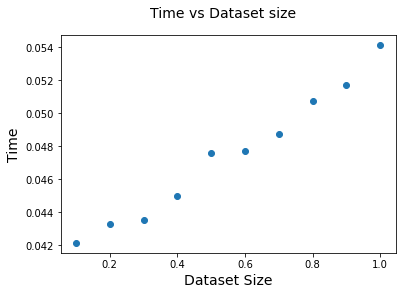

In [17]:
fig = plt.figure()
newList = [x / 10 for x in selectionSizeRange]
plt.scatter(newList, runtimes)
fig.suptitle('Time vs Dataset size', fontsize=14)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('Breastcancer_KNN_plot_timeVSdatasetsize.png')
plt.show()

In [16]:
runtimes

[0.04213923600003909,
 0.043291019999987836,
 0.04352907599997707,
 0.0449635599999965,
 0.047564240000065185,
 0.04768910400001914,
 0.04872317200001817,
 0.050727811999986445,
 0.05171538799998416,
 0.054129956000006134]

In [15]:
runtimes = []
for key in runtime.keys():
    print(runtime[key])
    runtimes.append(sum(runtime[key])/len(runtime[key]))
print(runtimes)

[0.046327300000029936, 0.04347630000006575, 0.0417210000000523, 0.04207189999988259, 0.042526800000132425, 0.041242499999953, 0.04131710000001476, 0.041061600000148246, 0.041277300000047035, 0.03983140000013918, 0.04054459999997562, 0.04030570000008993, 0.0421556999999666, 0.04079109999997854, 0.04446480000001429, 0.04283660000010059, 0.041298900000128924, 0.04357720000007248, 0.04034060000003592, 0.041079100000160906, 0.04074809999997342, 0.04445850000001883, 0.044806000000107815, 0.04297639999981584, 0.042244400000072346]
[0.04287490000001526, 0.042010200000049736, 0.0439169999999649, 0.04450829999996131, 0.04502920000004451, 0.04168129999993653, 0.045247399999880145, 0.043028800000001866, 0.042325600000140184, 0.043566199999986566, 0.04226539999990564, 0.04385490000004211, 0.051270800000111194, 0.0416838999999527, 0.04404609999983222, 0.04152890000000298, 0.04327970000008463, 0.04295670000010432, 0.04221299999994699, 0.04192650000004505, 0.04247280000004139, 0.042942599999832964, 0.